<a href="https://colab.research.google.com/github/anshuman-8/Loan-Prediction/blob/main/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loan Approval Prediction


In [65]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
%matplotlib inline
from sklearn.metrics import mean_squared_error

In [66]:
Loan_data = pd.read_csv("/loan_dataset.csv")
# Loan_data=datasets.loan_dataset.csv
Loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [67]:
print(Loan_data.keys())

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')


In [68]:
Loan_data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [69]:
Loan_data['LoanAmount'] = Loan_data['LoanAmount'].fillna(Loan_data['LoanAmount'].mean())
Loan_data['Loan_Amount_Term'] = Loan_data['Loan_Amount_Term'].fillna(Loan_data['Loan_Amount_Term'].mean())
Loan_data['Credit_History'] = Loan_data['Credit_History'].fillna(Loan_data['Credit_History'].mean())

In [70]:
Loan_data['Gender'] = Loan_data["Gender"].fillna(Loan_data['Gender'].mode()[0])
Loan_data['Married'] = Loan_data["Married"].fillna(Loan_data['Married'].mode()[0])
Loan_data['Dependents'] = Loan_data["Dependents"].fillna(Loan_data['Dependents'].mode()[0])
Loan_data['Self_Employed'] = Loan_data["Self_Employed"].fillna(Loan_data['Self_Employed'].mode()[0])

In [71]:
Loan_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [72]:
Loan_data['Total_Income'] = Loan_data['ApplicantIncome'] + Loan_data['CoapplicantIncome']


In [73]:
Loan_data.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.000000,Urban,5720
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.000000,Urban,4576
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.000000,Urban,6800
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0.825444,Urban,4886
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.000000,Urban,3276


In [74]:
data_X,data_Y=Loan_data['Total_Income'].values, Loan_data['LoanAmount'].values

In [75]:
model=linear_model.LinearRegression()
model.fit(data_X.reshape(-1, 1),data_Y.reshape(-1, 1))

LinearRegression()

In [76]:
pridicted_Y=model.predict(data_X.reshape(-1, 1))
print("Square mean error is :",mean_squared_error(data_Y,pridicted_Y))

Square mean error is : 2662.4072106084873


In [77]:
print("Weights: ",model.coef_)
print("Intercepts: ",model.intercept_)

Weights:  [[0.00621654]]
Intercepts:  [96.50107062]


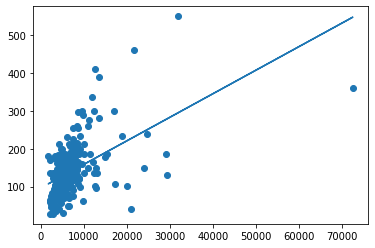

In [84]:
plt.scatter(data_X.reshape(-1, 1),data_Y.reshape(-1, 1))
plt.plot(data_X.reshape(-1,1),pridicted_Y)
plt.show()
